# Проект: Анализ товарного ассортимента

## Цель исследования: 

Проанализировать ассортимент товаров интернет-магазина товаров для дома «Пока все ещё тут»

## Задачи:

1. Подготовить данные по товарам и заказам интернет-магазина «Пока все ещё тут» на основе предоставленного датасета
2. Провести анализ данных по товарам и заказам 
3. Проанализировать торговый ассортимент, и выделить основной и дополнительный ассортимент интернет-магазина
4. Провести исследовательский анализ данных по товарам и заказам
5. Сформулировать гипотезы и проверить их
6. Разработать презентацию, содержащую результаты исследования 
7. Разработать дашборд на основании исследования

### Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import scipy.stats as stats
from scipy import stats as st
import re

In [2]:
df_addon = pd.read_csv(r"C:\Users\shian\портфолио\dataset_1.csv")

In [3]:
df_addon.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


##### Дату приводим к нужному виду, все остальные данные в правильном формате

In [5]:
df_addon['date'] = pd.to_datetime(df_addon['date'], format='%Y%m%d%H')

In [6]:
# проверяем смену формата
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


In [7]:
# проверяем смену формата
df_addon.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [8]:
df_addon.shape

(7474, 6)

In [118]:
df_addon.describe(datetime_is_numeric=True)

,date,order_id,quantity,price,year,month,day,hours,sum_total
count,5543,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000
mean,2019-05-05 13:10:52.065668608,55861.888508,2.401948,530.341707,2018.829876,6.668952,3.658849,13.778640,708.331123
min,2018-10-01 00:00:00,12624.000000,1.000000,9.000000,2018.000000,1.000000,1.000000,0.000000,9.000000
25%,2019-01-30 14:00:00,14810.000000,1.000000,90.000000,2019.000000,4.000000,2.000000,10.000000,120.000000
50%,2019-04-29 12:00:00,69184.000000,1.000000,150.000000,2019.000000,6.000000,4.000000,14.000000,194.000000
75%,2019-07-28 17:00:00,71935.000000,1.000000,524.000000,2019.000000,10.000000,5.000000,17.000000,734.000000
max,2020-01-31 15:00:00,112789.000000,334.000000,14917.000000,2020.000000,12.000000,7.000000,23.000000,49432.000000
std,NaN,32502.039914,9.592307,973.854171,0.488144,3.601834,1.965412,4.938952,1656.164452


##### Проверяем на дубликаты

In [10]:
df_addon.duplicated().sum()

0

In [11]:
# смотрим кол-во дубликатов по столбцу product
df_addon[df_addon.duplicated(['product'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
76,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [12]:
#переводим в нижний регистр столбец product, чтобы сократить кол-во дубликатов
df_addon['product'] = df_addon['product'].str.lower()

In [13]:
#также заменим в данных все ё на е (на первый взгляд данных с ё не много, но это может помочь по некоторым дубликатам)
df_addon['product'] = df_addon['product'].str.replace('ё', 'е')

In [14]:
#также заменим в данных все ' , ' на ' ' 
#df_addon['product'] = df_addon['product'].str.replace(',', ' ')

In [15]:
df_addon[df_addon.duplicated(['product'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
76,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [16]:
# смотрим кол-во дубликатов по столбцу order_id
df_addon[df_addon.duplicated(['order_id'])]

,date,customer_id,order_id,product,quantity,price
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0


In [17]:
# смотрим кол-во дубликатов по столбцу customer_id
df_addon[df_addon.duplicated(['customer_id'])]

,date,customer_id,order_id,product,quantity,price
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [18]:
df_addon['customer_id'].sort_values().nunique()

2451

In [20]:
df_addon['order_id'].sort_values().nunique()

3521

In [22]:
df_addon['product'].sort_values().nunique()

2341

In [23]:
#проверим кол-во дубликов по 4 столбцам
df_addon[['product','order_id', 'customer_id', 'quantity', 'price']].duplicated().sum()


1864

In [24]:
duplicated = df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])]
duplicated = duplicated.sort_values(by = ["order_id", "product"])
duplicated.head(20)

,date,customer_id,order_id,product,quantity,price
376,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
509,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
588,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
758,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
816,2018-11-15 15:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
827,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
377,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
510,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
589,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
759,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0


In [25]:
#смотрим долю дубликатов от общего кол-ва
print(df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])].shape[0] / len(df_addon))

0.24939791276424939


#### Наши дубликаты это воронка продаж по заказам (история заказа), поэтому мы отставим только заказ с последней датой

In [26]:
df_addon.shape

(7474, 6)

In [27]:
# удаляем дубликаты
df_addon = df_addon.drop_duplicates(subset=['product','order_id','customer_id','quantity','price'],\
                                   keep = 'last', ignore_index = False)

In [28]:
print("Количество строк после удаления:", df_addon.shape[0])

Количество строк после удаления: 5610


In [29]:
# проверим, что удалили все дубликаты
df_addon[['product','order_id', 'customer_id', 'quantity', 'price']].duplicated().sum()


0

##### Проверяем на пропуски

In [30]:
df_addon.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

##### Проверяем на аномальные значения

In [119]:
df_addon.describe(datetime_is_numeric=True)

,date,order_id,quantity,price,year,month,day,hours,sum_total
count,5543,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000
mean,2019-05-05 13:10:52.065668608,55861.888508,2.401948,530.341707,2018.829876,6.668952,3.658849,13.778640,708.331123
min,2018-10-01 00:00:00,12624.000000,1.000000,9.000000,2018.000000,1.000000,1.000000,0.000000,9.000000
25%,2019-01-30 14:00:00,14810.000000,1.000000,90.000000,2019.000000,4.000000,2.000000,10.000000,120.000000
50%,2019-04-29 12:00:00,69184.000000,1.000000,150.000000,2019.000000,6.000000,4.000000,14.000000,194.000000
75%,2019-07-28 17:00:00,71935.000000,1.000000,524.000000,2019.000000,10.000000,5.000000,17.000000,734.000000
max,2020-01-31 15:00:00,112789.000000,334.000000,14917.000000,2020.000000,12.000000,7.000000,23.000000,49432.000000
std,NaN,32502.039914,9.592307,973.854171,0.488144,3.601834,1.965412,4.938952,1656.164452


##### По столбцу price достаточно большое стандартное отклонение, большая разница между средней и медианой, а также аномально большое максимальное значение. По столбцу quantity, аномальное значение в  квартиле. Посмотрим подробнее по данным столбцам 

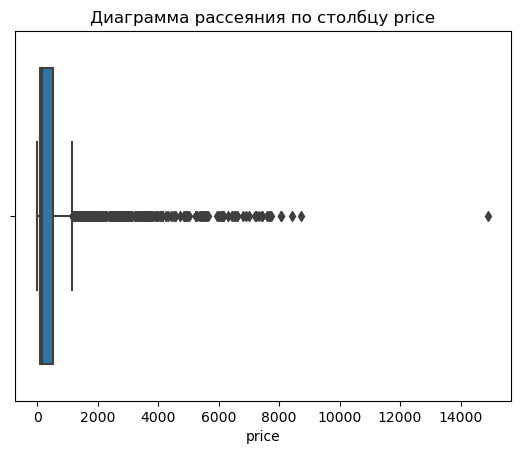

In [32]:
ax = sns.boxplot(x=df_addon ['price']) 

ax.set_title('Диаграмма рассеяния по столбцу price')

plt.show()

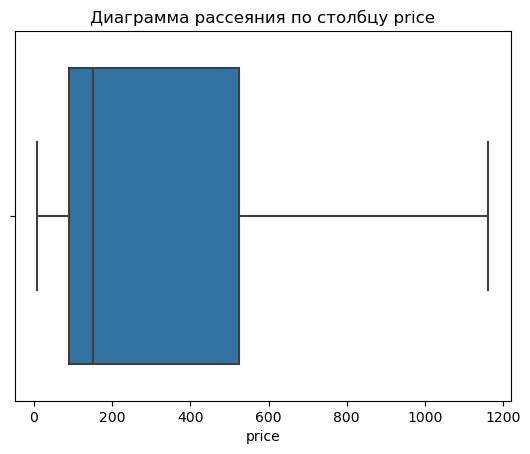

In [33]:
ax = sns.boxplot(x=df_addon ['price'], showfliers=False) 

ax.set_title('Диаграмма рассеяния по столбцу price')

plt.show()

In [34]:
#смотрим процент данных
(df_addon['price'] > 1100).mean() 

0.12406417112299466

In [35]:
#найдем значение, соответствующее 1% аномальных данных
(df_addon['price'] > 5100).mean()

0.010873440285204991

In [37]:
#посмотрим подробнее аномальные значения
price_5000 = df_addon.query('price > 5100')
price_5000.head(30)

,date,customer_id,order_id,product,quantity,price
596,2018-11-02 17:00:00,305c9634-ec53-46be-af05-48ee8bd790a5,68836,сумка-тележка хозяйственная andersen scala sho...,1,5249.0
634,2018-11-05 02:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,сумка-тележка хозяйственная rolser imx005 mare...,1,6007.0
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malv...,1,7597.0
655,2018-11-05 22:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68871,сумка-тележка хозяйственная rolser imx005 mare...,1,6007.0
768,2018-11-11 18:00:00,06e2fc7e-6183-4419-ada4-3b976baeed92,68952,коврик для ванной комнаты gobi полиэстер 120х7...,1,5474.0
1121,2018-12-06 17:00:00,82b56a76-0dc9-4dae-aa76-863a9a80f082,69236,покрывало жаккард karna стеганое kalven 260x26...,1,6134.0
1122,2018-12-06 17:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,сумка-тележка хозяйственная andersen scala sho...,1,5249.0
1180,2018-12-12 11:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69320,сумка-тележка хозяйственная andersen treppenst...,1,5662.0
1241,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,гладильная доска leifheit airboard compact m p...,1,7424.0
1420,2018-12-29 09:00:00,ad66d870-22f5-43bc-958f-73420822586b,69681,сумка-тележка хозяйственная rolser pack gloria...,1,6307.0


##### Посмотрев данные по аномальному значения цены, погуглив эти товары в интернете, видим, что цены вполне реальные, поэтому удалять эти данные мы не будем

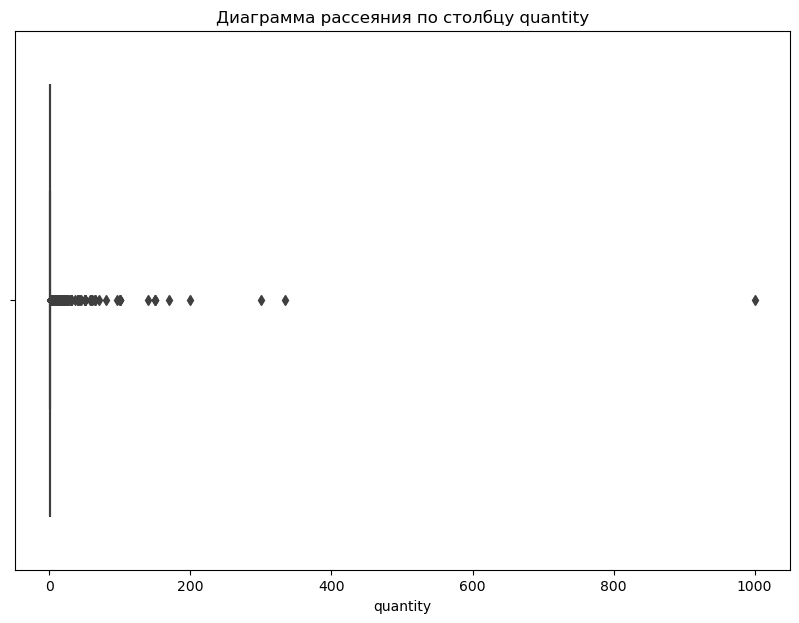

In [38]:
ax = sns.boxplot(x=df_addon ['quantity']) 

ax.set_title('Диаграмма рассеяния по столбцу quantity')
ax.figure.set_size_inches(10, 7) 

plt.show()

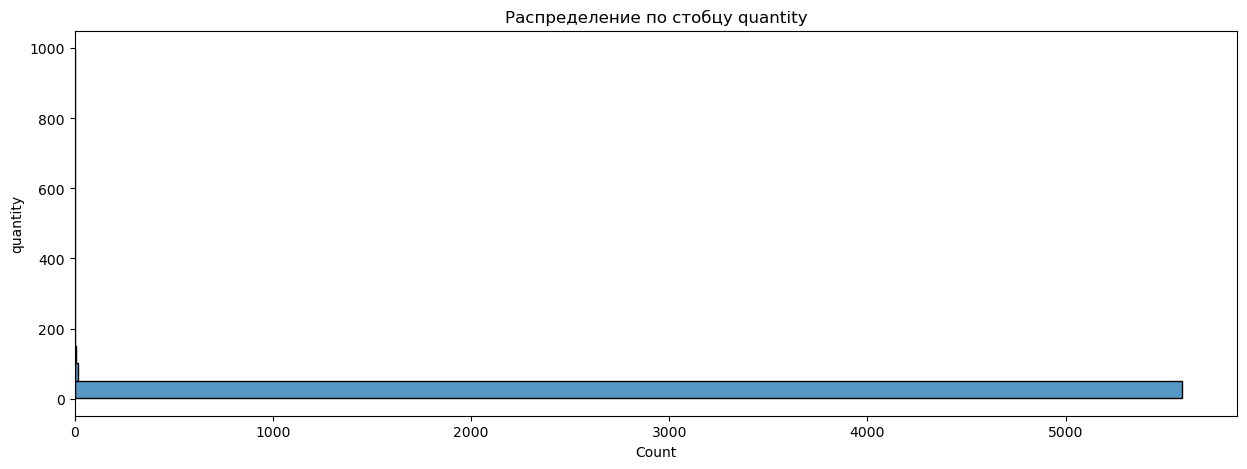

In [39]:
ax = sns.histplot(data=df_addon, y='quantity', bins=20, kde=False)

ax.set_title('Распределение quantity')  
ax.figure.set_size_inches(15, 5)

plt.title('Распределение по стобцу quantity')
plt.show()

In [40]:
#смотрим процент данных
(df_addon['quantity'] > 1).mean() 

0.2016042780748663

In [41]:
#найдем значение, соответствующее 1% аномальных данных
(df_addon['quantity'] > 150).mean()

0.00089126559714795

In [43]:
#посмотрим на аномльные данные подробнее
quantity_150 = df_addon.query('quantity > 150')
quantity_150.head(20)

,date,customer_id,order_id,product,quantity,price
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0


##### Все данные по заказам похожи на реальные, эти товары могли приобрести в таком кол-ве для ремонта, дизайна гостинницы, ТЦ, ресторана. Исключение заказ 71743, покупка товара "вантуз с деревянной ручкой" 1000шт, кажется странной, скорее всего это ошибка или тестовый заказ, поэтому его мы удалим. 

In [44]:
df_addon.drop(index=df_addon.query('quantity > 999').index,inplace=True)

In [45]:
(df_addon['quantity'] > 999).mean()

0.0

##### Проверяем, что у товаров в одном заказе один покупатель и при необходимости, удаляем

In [46]:
unique = df_addon.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1')
unique.count()

customer_id    29
dtype: int64

###### Мы обнаружили, что есть 29 заказов, у которых больше 1 покупателя, удалим эти данные. 

In [47]:
len(df_addon)

5609

In [48]:
df_addon.drop(index=df_addon.query('order_id in @unique.index').index,inplace=True)

In [49]:
# Проверяем, что удалили все верно 
len(df_addon)

5543

##### Создадим столбец с месяцем и годом, днем недели и часом

In [50]:
df_addon['year'] = df_addon['date'].dt.year
df_addon['month'] = df_addon['date'].dt.month#astype('datetime64[M]')
df_addon['day'] = (df_addon['date'].dt.dayofweek) + 1
df_addon['hours'] = df_addon['date'].dt.hour

In [52]:
#проверяем, что создали столбцы верно 
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0


##### Создадим столбец с общей суммой за заказ

In [53]:
df_addon['sum_total'] = df_addon['quantity'] * df_addon['price']
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0


<div style="border:solid purple 3px; padding: 20px">
Выполнили предобработку данных, у всех данных верный формат, кроме времени, его поменяли. Проверили данные на пропуски, их не оказалось. Более 24% дубликатов удалили, т.к. это дубли одних и тех же заказов. Также проверили данные на то, чтобы в одном заказе был один покупатель. Обнаружили 29 заказов, их также удалили. Затем создали столбцы по году, месяцу, дню недели, времени и столбец с суммой заказа

## Анализ данных

##### Проверим период, за который предосталены данные

In [54]:
df_addon['date'].min()

Timestamp('2018-10-01 00:00:00')

In [55]:
df_addon['date'].max()

Timestamp('2020-01-31 15:00:00')

##### Посмотрим период, в который больше всего продаж в разбивке по месяцам с учетом года, дня недели и времени

In [56]:
#посмотрим по дням по кол-ву заказов
orders_per_day = df_addon.groupby('day')['order_id'].nunique().reset_index()
orders_per_day

,day,order_id
0,1,586
1,2,594
2,3,534
3,4,554
4,5,465
5,6,342
6,7,434


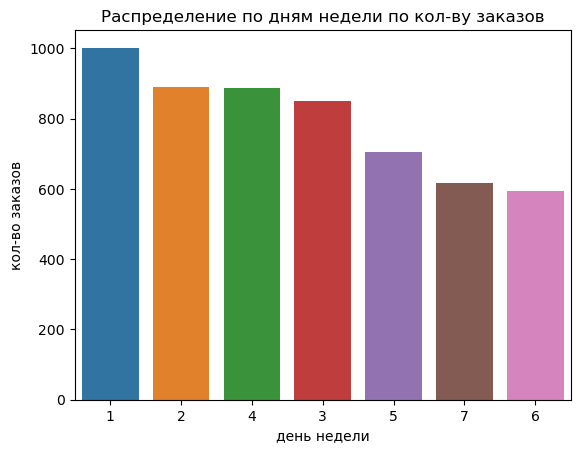

In [57]:
df_addon_grouped = df_addon.groupby('day')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['day'].values

ax = sns.barplot(data=df_addon_grouped, x='day', y='count', order=order)

plt.xlabel('день недели')
plt.ylabel('кол-во заказов')
plt.title('Распределение по дням недели по кол-ву заказов')
plt.show()


In [58]:
#посмотрим по дням по сумме продаж
amount_per_day = df_addon.groupby('day')['price'].sum().reset_index().round(2)
amount_per_day

,day,price
0,1,486934.33
1,2,479622.50
2,3,474592.17
3,4,451877.33
4,5,404538.75
5,6,293763.50
6,7,348355.50


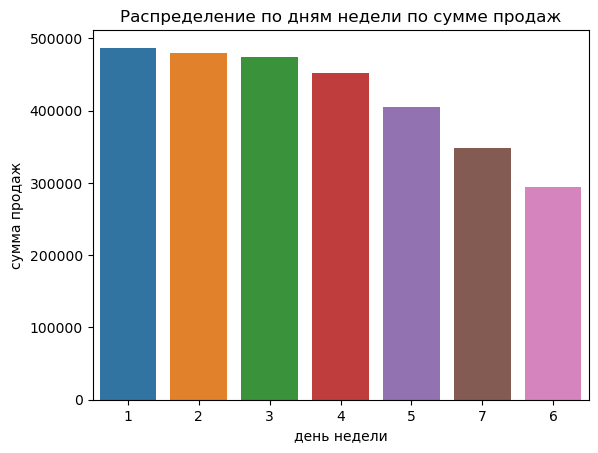

In [59]:
df_addon_grouped = df_addon.groupby('day')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['day'].values

ax = sns.barplot(data=df_addon_grouped, x='day', y='sum', order=order)

plt.xlabel('день недели')
plt.ylabel('сумма продаж')
plt.title('Распределение по дням недели по сумме продаж')
plt.show()


In [60]:
#посмотрим по часам по кол-ву заказов
orders_per_hour = df_addon.groupby('hours')['order_id'].nunique().reset_index().sort_values('order_id', ascending=False) 
orders_per_hour

,hours,order_id
11,11,291
13,13,269
12,12,268
10,10,266
14,14,254
15,15,244
9,9,211
16,16,204
17,17,187
21,21,176


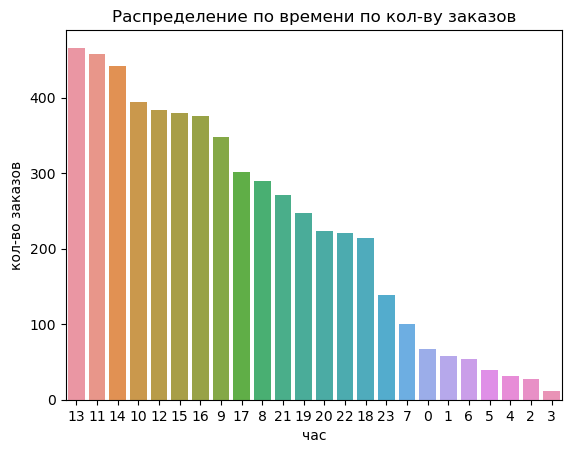

In [61]:
df_addon_grouped = df_addon.groupby('hours')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['hours'].values

ax = sns.barplot(data=df_addon_grouped, x='hours', y='count', order=order)

plt.xlabel('час')
plt.ylabel('кол-во заказов')
plt.title('Распределение по времени по кол-ву заказов')
plt.show()

In [62]:
#посмотрим по часам по сумме продаж
amount_per_hour = df_addon.groupby('hours')['price'].sum().reset_index().round(2).sort_values('price', ascending=False) 
amount_per_hour

,hours,price
11,11,231538.50
12,12,226874.67
14,14,210695.50
13,13,208138.33
10,10,201146.17
17,17,195578.00
15,15,195368.17
16,16,171773.50
9,9,170413.00
18,18,153438.42


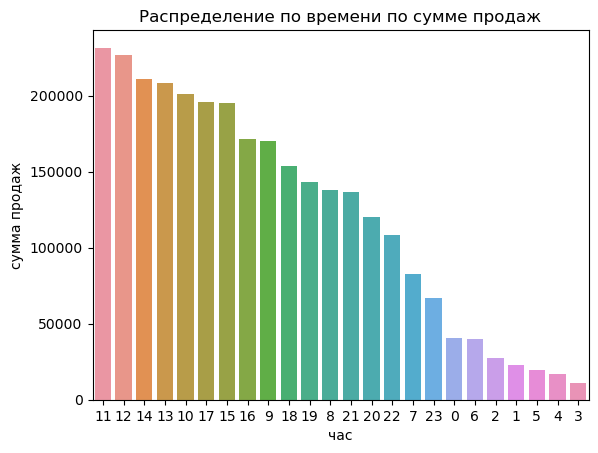

In [63]:
df_addon_grouped = df_addon.groupby('hours')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['hours'].values

ax = sns.barplot(data=df_addon_grouped, x='hours', y='sum', order=order)

plt.xlabel('час')
plt.ylabel('сумма продаж')
plt.title('Распределение по времени по сумме продаж')
plt.show()

In [64]:
#создадим столбец с месяцем и годом, т.к. данные представлены за 2018 и 2019 год
df_addon['month_year'] = df_addon['month'].astype(str) + '-' + df_addon['year'].astype(str)
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total,month_year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0,10-2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0,10-2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0,10-2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0,10-2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0,10-2018


In [65]:
#смотрим на данные по месяцу и году по кол-ву заказов
orders_per_month = df_addon.groupby('month_year')['order_id'].nunique().reset_index()
orders_per_month.sort_values('order_id', ascending=False)

,month_year,order_id
8,2-2019,287
6,12-2018,276
1,1-2020,269
10,4-2019,264
7,12-2019,246
9,3-2019,243
2,10-2018,237
5,11-2019,217
4,11-2018,204
3,10-2019,203


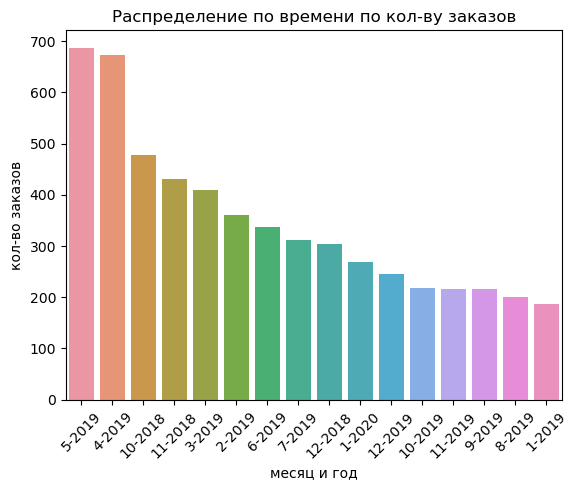

In [66]:
df_addon_grouped = df_addon.groupby('month_year')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['month_year'].values

ax = sns.barplot(data=df_addon_grouped, x='month_year', y='count', order=order)

plt.xlabel('месяц и год')
plt.ylabel('кол-во заказов')
plt.title('Распределение по времени по кол-ву заказов')
plt.xticks(rotation=45)
plt.show()

In [67]:
#смотрим на данные по месяцу и году по сумме продаж
amount_per_month = df_addon.groupby('month_year')['price'].sum().reset_index().round(2).sort_values('price', ascending=False) 
amount_per_month

,month_year,price
2,10-2018,266619.00
6,12-2018,253105.00
4,11-2018,232283.00
8,2-2019,226812.00
10,4-2019,218601.00
9,3-2019,199450.00
13,7-2019,183969.00
7,12-2019,181495.33
3,10-2019,168860.00
1,1-2020,163558.33


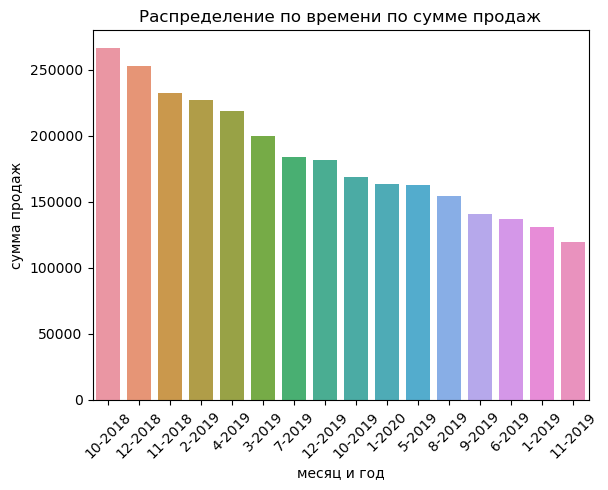

In [68]:
df_addon_grouped = df_addon.groupby('month_year')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['month_year'].values

ax = sns.barplot(data=df_addon_grouped, x='month_year', y='sum', order=order)

plt.xlabel('месяц и год')
plt.ylabel('сумма продаж')
plt.title('Распределение по времени по сумме продаж')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid purple 3px; padding: 20px">
В датасете представлены данные за период с 01.10.2018 по 31.01.2020. 

Больше всего заказов по кол-ву и по сумме в пн и вт, меньше в сб, вс. 
По часам больше заказов в период с 12 по 13 часов. Пик в 13 часов. По сумме с 13 по 14 часов и 11 часов. Пик 11-12. 
    
Меньше всего по кол-ву и по сумме ночью с 12 часов до утра 7. 

Самое большое кол-во заказов по месяцам с учетом года май 2019, апрель 2019 (также по сумме продаж), меньше всего заказов в январе и августе 2019 (также по сумме продаж). По сумме продаж больше всего в октябре 2018 и декабре 2018. Меньше продаж по сумме январь 2019 и ноябрь 2019

##### Выявим наиболее популярные товары по продажам по кол-ву и по сумме продаж

In [69]:
df_addon

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total,month_year
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0,10-2018
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0,10-2018
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0,10-2018
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0,10-2018
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0,10-2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,2020,1,4,21,76.0,1-2020
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,2020,1,4,22,869.0,1-2020
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,2020,1,5,2,354.0,1-2020
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020,1,5,12,128.0,1-2020


In [70]:
# посмотрим топ 15 товаров по кол-ву заказов
orders_product = df_addon.groupby('product')['order_id'].nunique().reset_index()
orders_product = orders_product.sort_values('order_id', ascending=False).head (15)
orders_product

,product,order_id
1036,пеларгония розебудная red pandora укорененный ...,65
1034,пеларгония розебудная prins nikolai укорененны...,54
1008,пеларгония зональная диам. 12 см сиреневый пол...,53
1610,сумка-тележка 2-х колесная gimi argo синяя,47
1033,пеларгония розебудная mary укорененный черенок,40
1032,пеларгония розебудная margaretha укорененный ч...,31
1035,пеларгония розебудная queen ingrid укорененный...,31
1016,пеларгония зональная махровая лососевая,25
1022,пеларгония зональная ринго вайт d-7 см h-10 см...,25
989,пеларгония зональная диам. 12 см коралловая по...,24


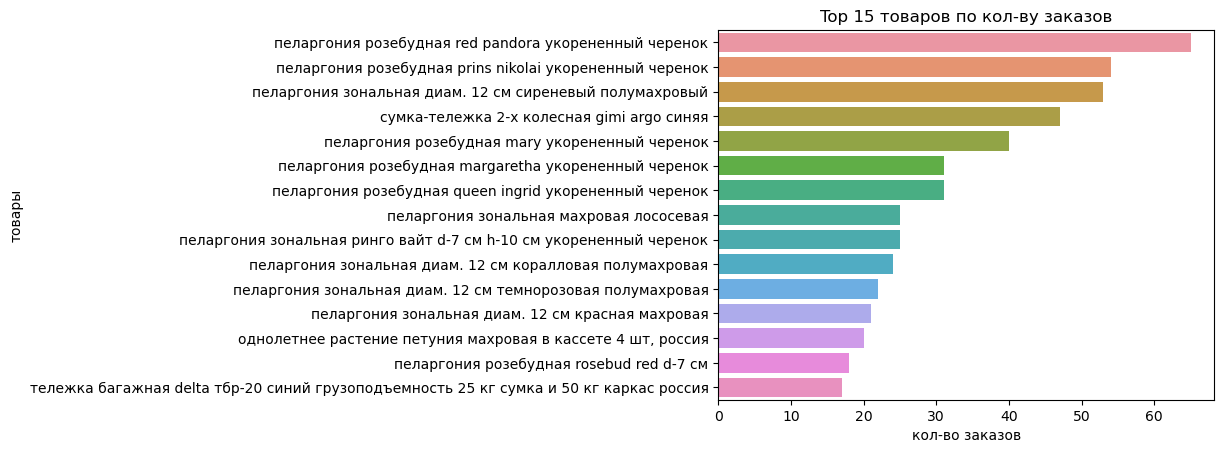

In [71]:
ax = sns.barplot(y='product', x='order_id', data=orders_product)

ax.set_xlabel('кол-во заказов')  
ax.set_ylabel('товары')
ax.set_title('Top 15 товаров по кол-ву заказов')

plt.show()

In [72]:
# посмотрим топ 15 товаров по сумме продаж
price_product = df_addon.groupby('product')['price'].sum().reset_index()
price_product = price_product.sort_values('price', ascending=False).head (15)
price_product

,product,price
1610,сумка-тележка 2-х колесная gimi argo синяя,50405.0
1636,сумка-тележка хозяйственная andersen scala sho...,28045.0
1693,сушилка meliconi stendy junior,27970.0
1683,сумка-тележка хозяйственная rolser pack gloria...,19674.0
1617,сумка-тележка 2-х колесная gimi galaxy черная,19568.0
1621,сумка-тележка 3-х колесная gimi tris floral синяя,18893.0
1641,сумка-тележка хозяйственная andersen treppenst...,18560.0
1639,сумка-тележка хозяйственная andersen scala sho...,18296.0
1619,сумка-тележка 2-х колесная складная gimi flexi...,18139.0
255,гладильная доска sarayli new elegant 125x45 см,17843.0


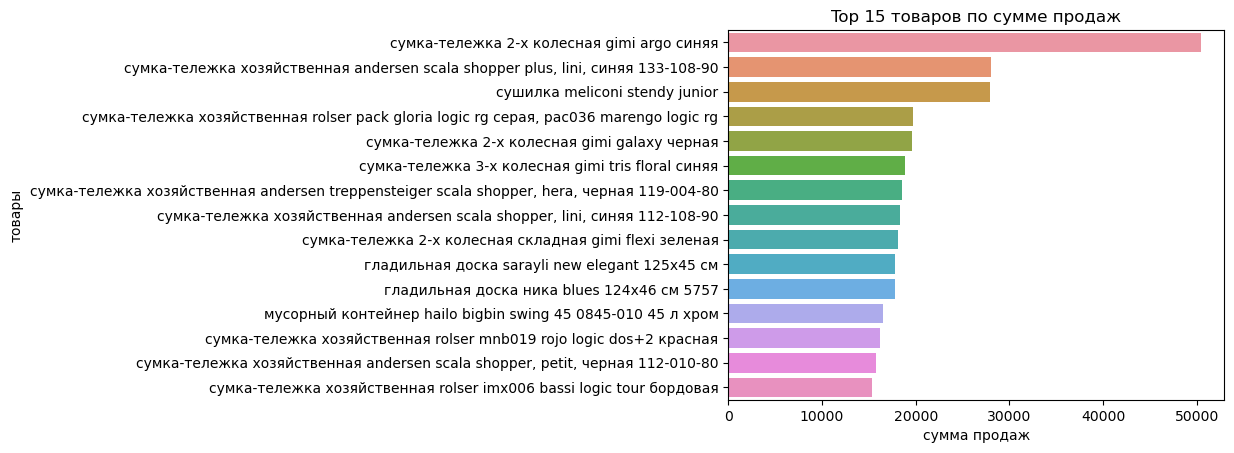

In [73]:
ax = sns.barplot(y='product', x='price', data=price_product)

ax.set_xlabel('сумма продаж')  
ax.set_ylabel('товары')
ax.set_title('Top 15 товаров по сумме продаж')

plt.show()

<div style="border:solid purple 3px; padding: 20px">
Больше всего было продано по сумме продаж - сумка-тележка 2-х колесная gimi argo синяя, топ -3 по продажам это сумки тележки, также большая часть топа это сумки тележки в разных конфигурациях. 
    
Больше всего по кол-ву было продано пеларгония розебудная red pandora, также большую часть топа занимают данные растения.     

### Анализ ассортимента

##### Рассмотрим ассортимент

In [74]:
unique_products = len(df_addon['product'].unique())
print('Кол-во уникальных товаров:', unique_products)

Кол-во уникальных товаров: 2331


##### Выделим категории товаров

In [75]:
# проверяем еще раз тип данных по столбцу product
print(df_addon['product'].dtype)

object


In [77]:
df_addon['product']

0         комнатное растение в горшке алое вера, d12, h30
1       комнатное растение в горшке кофе арабика, d12,...
2                             радермахера d-12 см h-20 см
3                        хризолидокарпус лутесценс d-9 см
4                          циперус зумула d-12 см h-25 см
                              ...                        
7469    томата (помидор) черниченский черри № 116 сорт...
7470           дендробиум санок анна грин 1 ствол d-12 см
7471    подставка для обуви резиновая attribute 80x40 ...
7472    тагетис крупноцветковый рассада однолетних цве...
7473    вешалка для блузок 41 см красный attribute ahm781
Name: product, Length: 5543, dtype: object

In [78]:
#приведем к нижнему регистру и удалим лишние пробелы в столбце product в начале и конце значений
df_addon['product'] = df_addon['product'].str.lower()
df_addon['product'] = df_addon['product'].str.strip()

0         комнатное растение в горшке алое вера, d12, h30
1       комнатное растение в горшке кофе арабика, d12,...
2                             радермахера d-12 см h-20 см
3                        хризолидокарпус лутесценс d-9 см
4                          циперус зумула d-12 см h-25 см
                              ...                        
7469    томата (помидор) черниченский черри № 116 сорт...
7470           дендробиум санок анна грин 1 ствол d-12 см
7471    подставка для обуви резиновая attribute 80x40 ...
7472    тагетис крупноцветковый рассада однолетних цве...
7473    вешалка для блузок 41 см красный attribute ahm781
Name: product, Length: 5543, dtype: object

In [79]:
#удалим лишние пробелы, оставляя только по одному пробелу между словами в значениях столбца product
df_addon['product'] = df_addon['product'].str.replace('\s+', ' ', regex=True)

In [80]:
# разделим строки по отдельным столбцам
words = df_addon['product'].str.split()
words

0       [комнатное, растение, в, горшке, алое, вера,, ...
1       [комнатное, растение, в, горшке, кофе, арабика...
2                       [радермахера, d-12, см, h-20, см]
3                   [хризолидокарпус, лутесценс, d-9, см]
4                   [циперус, зумула, d-12, см, h-25, см]
                              ...                        
7469    [томата, (помидор), черниченский, черри, №, 11...
7470    [дендробиум, санок, анна, грин, 1, ствол, d-12...
7471    [подставка, для, обуви, резиновая, attribute, ...
7472    [тагетис, крупноцветковый, рассада, однолетних...
7473    [вешалка, для, блузок, 41, см, красный, attrib...
Name: product, Length: 5543, dtype: object

In [81]:
#найдем пары слов, больше 3 букв 
pairs = [tuple(words[:2]) for words in words if len(words[0]) > 3 and len(words[1]) > 3]

pairs

[('комнатное', 'растение'),
 ('комнатное', 'растение'),
 ('радермахера', 'd-12'),
 ('хризолидокарпус', 'лутесценс'),
 ('циперус', 'зумула'),
 ('шеффлера', 'лузеана'),
 ('юкка', 'нитчатая'),
 ('настенная', 'сушилка'),
 ('чехол', 'eurogold'),
 ('крючок', 'одежный'),
 ('корзина', 'мягкая'),
 ('многолетнее', 'растение'),
 ('рассада', 'зелени'),
 ('рассада', 'зелени'),
 ('муляж', '"райские'),
 ('муляж', 'банан,'),
 ('муляж', 'виноград'),
 ('муляж', 'гранат'),
 ('муляж', 'груша'),
 ('муляж', 'груша,'),
 ('муляж', 'зеленое'),
 ('муляж', 'клубника'),
 ('муляж', 'клубника'),
 ('муляж', 'красное'),
 ('муляж', 'лимон,'),
 ('муляж', 'мандарин,'),
 ('муляж', 'перец,'),
 ('муляж', 'перец,'),
 ('муляж', 'персики'),
 ('муляж', 'томат,'),
 ('муляж', 'черешня'),
 ('тарелка', 'обеденная'),
 ('вилка', 'столовая'),
 ('ложка', 'столовая'),
 ('ложка', 'чайная'),
 ('герань', 'домашняя'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('

In [82]:
pairs_dict = {}

for pair in pairs:
  if pair not in pairs_dict:
    pairs_dict[pair] = 1
  else:
    pairs_dict[pair] += 1

print(f"Количество уникальных пар слов: {len(pairs_dict)}")

Количество уникальных пар слов: 745


In [83]:
#посмотрим список пар слов
for pair in list(pairs_dict)[:]:
  print(pair)

('комнатное', 'растение')
('радермахера', 'd-12')
('хризолидокарпус', 'лутесценс')
('циперус', 'зумула')
('шеффлера', 'лузеана')
('юкка', 'нитчатая')
('настенная', 'сушилка')
('чехол', 'eurogold')
('крючок', 'одежный')
('корзина', 'мягкая')
('многолетнее', 'растение')
('рассада', 'зелени')
('муляж', '"райские')
('муляж', 'банан,')
('муляж', 'виноград')
('муляж', 'гранат')
('муляж', 'груша')
('муляж', 'груша,')
('муляж', 'зеленое')
('муляж', 'клубника')
('муляж', 'красное')
('муляж', 'лимон,')
('муляж', 'мандарин,')
('муляж', 'перец,')
('муляж', 'персики')
('муляж', 'томат,')
('муляж', 'черешня')
('тарелка', 'обеденная')
('вилка', 'столовая')
('ложка', 'столовая')
('ложка', 'чайная')
('герань', 'домашняя')
('пеларгония', 'зональная')
('котел', 'алюминиевый')
('суккулент', 'микс')
('эхеверия', 'перл')
('доска', 'гладильная')
('набор', 'прищепок')
('коврик', 'придверный')
('коврик', 'bacchetta')
('корзина', 'пластиковая')
('набор', 'кружек')
('коврик', 'интерьерный')
('муляж', 'виноград,'

In [84]:
#найдем уникальные слова из пар слов
unique_words = set([word for wordlist in pairs for word in wordlist])
unique_words

{'"райские',
 '(глоксиния)',
 '(лобулярия)',
 '(очиток)',
 '(полынь',
 '(помидор)',
 '(ромашка)',
 '150х120',
 '214х150',
 '350х150',
 '350х180',
 '40х40',
 'aloha',
 'alparaisa',
 'alpenkok',
 'ampari',
 'angeleyes',
 'attribute',
 'aura',
 'avex',
 'baby',
 'bacchetta',
 'bella',
 'bloomtastic',
 'blue',
 'bolero',
 'bordeaux',
 'brava',
 'city',
 'colombo',
 'crazytunia',
 'curver',
 'd-10',
 'd-11',
 'd-12',
 'd-13',
 'd-15',
 'd-17',
 'd-20',
 'd-23',
 'dark',
 'dasch',
 'delta',
 'dogrular',
 'eurogold',
 'extra',
 'fabrikators',
 'framar',
 'fuhcsia',
 'gimi',
 'hard',
 'infinity',
 'karna',
 'knit',
 'latex',
 'leifheit',
 'louvre',
 'luminarc',
 'marmiton',
 'meiwa',
 'meliconi',
 'mini',
 'natures',
 'orange',
 'pasabahce',
 'pegasus',
 'pickwick',
 'posh',
 'potunia',
 'protec',
 'qwerty',
 'rave',
 'rozenbal',
 'sanguna',
 'sarayli',
 'scab',
 'scovo',
 'silver',
 'sochi',
 'surfinia',
 'surprice',
 'surprise',
 'sweet',
 'sweetunia',
 'swingtime',
 'tepмокружка',
 'toscana

In [85]:
#профильтруем список пар, оставляя только те пары, где присутствует хотя бы одно слово из множества уникальных слов
filtered_pairs = []
for pair in pairs:
    if pair[0] in unique_words or pair[1] in unique_words:
        filtered_pairs.append(pair)

In [86]:
all_words = [x for pair in filtered_pairs for x in pair]
all_words

['комнатное',
 'растение',
 'комнатное',
 'растение',
 'радермахера',
 'd-12',
 'хризолидокарпус',
 'лутесценс',
 'циперус',
 'зумула',
 'шеффлера',
 'лузеана',
 'юкка',
 'нитчатая',
 'настенная',
 'сушилка',
 'чехол',
 'eurogold',
 'крючок',
 'одежный',
 'корзина',
 'мягкая',
 'многолетнее',
 'растение',
 'рассада',
 'зелени',
 'рассада',
 'зелени',
 'муляж',
 '"райские',
 'муляж',
 'банан,',
 'муляж',
 'виноград',
 'муляж',
 'гранат',
 'муляж',
 'груша',
 'муляж',
 'груша,',
 'муляж',
 'зеленое',
 'муляж',
 'клубника',
 'муляж',
 'клубника',
 'муляж',
 'красное',
 'муляж',
 'лимон,',
 'муляж',
 'мандарин,',
 'муляж',
 'перец,',
 'муляж',
 'перец,',
 'муляж',
 'персики',
 'муляж',
 'томат,',
 'муляж',
 'черешня',
 'тарелка',
 'обеденная',
 'вилка',
 'столовая',
 'ложка',
 'столовая',
 'ложка',
 'чайная',
 'герань',
 'домашняя',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'котел',
 'алюминиевый',
 'суккулент',
 'м

In [87]:
#определим в разные списки первые и вторые слова каждой пары
words1 = [x[0] for x in pairs]
words2 = [x[1] for x in pairs]

In [88]:
#объединим в один список
all_words = words1 + words2

In [89]:
#подсчитаем частоту каждого слова и найдем топ самых часто встречающихся слов
from collections import Counter
word_counts = Counter(all_words)
top_words = word_counts.most_common(100)

In [90]:
word_counts

Counter({'комнатное': 16,
         'радермахера': 1,
         'хризолидокарпус': 2,
         'циперус': 11,
         'шеффлера': 3,
         'юкка': 1,
         'настенная': 12,
         'чехол': 11,
         'крючок': 9,
         'корзина': 6,
         'многолетнее': 4,
         'рассада': 584,
         'муляж': 184,
         'тарелка': 51,
         'вилка': 8,
         'ложка': 16,
         'герань': 112,
         'пеларгония': 734,
         'котел': 1,
         'суккулент': 1,
         'эхеверия': 7,
         'доска': 145,
         'набор': 59,
         'коврик': 116,
         'цветок': 102,
         'эвкалипт': 14,
         'сумка-тележка': 154,
         'мусорный': 5,
         'плед': 4,
         'скатерть': 35,
         'кувшин': 8,
         'адиантум': 1,
         'ковер': 12,
         'перчатки': 10,
         'стремянка': 29,
         'гладильная': 143,
         'лестница-стремянка': 14,
         'тележка': 101,
         'готовая': 1,
         'искусственный': 103,
         'ча

In [91]:
top_words

[('пеларгония', 734),
 ('рассада', 584),
 ('зональная', 389),
 ('розебудная', 252),
 ('зелени', 236),
 ('томата', 194),
 ('муляж', 184),
 ('(помидор)', 168),
 ('хозяйственная', 157),
 ('сумка-тележка', 154),
 ('петуния', 146),
 ('доска', 145),
 ('гладильная', 143),
 ('коврик', 116),
 ('герань', 112),
 ('домашняя', 112),
 ('искусственный', 103),
 ('цветок', 102),
 ('тележка', 101),
 ('багажная', 88),
 ('растение', 83),
 ('роза', 70),
 ('однолетнее', 67),
 ('капусты', 67),
 ('придверный', 61),
 ('набор', 59),
 ('калибрахоа', 52),
 ('тарелка', 51),
 ('садовая', 50),
 ('ампельная', 48),
 ('махровая', 44),
 ('бакопа', 42),
 ('арбуза', 42),
 ('toscana', 40),
 ('скатерть', 35),
 ('огурца', 31),
 ('салатник', 30),
 ('кабачка', 30),
 ('стремянка', 29),
 ('qwerty', 28),
 ('полки', 27),
 ('подвесное', 27),
 ('luminarc', 27),
 ('кашпо', 27),
 ('вешалка', 26),
 ('дыни', 26),
 ('базилик', 25),
 ('чайник', 22),
 ('тыквы', 22),
 ('фуксия', 21),
 ('композиция', 21),
 ('surfinia', 21),
 ('обеденная', 20

In [92]:
#выделим топ категорий
categories = [word for word, cnt in top_words]

In [93]:
print(categories)

['пеларгония', 'рассада', 'зональная', 'розебудная', 'зелени', 'томата', 'муляж', '(помидор)', 'хозяйственная', 'сумка-тележка', 'петуния', 'доска', 'гладильная', 'коврик', 'герань', 'домашняя', 'искусственный', 'цветок', 'тележка', 'багажная', 'растение', 'роза', 'однолетнее', 'капусты', 'придверный', 'набор', 'калибрахоа', 'тарелка', 'садовая', 'ампельная', 'махровая', 'бакопа', 'арбуза', 'toscana', 'скатерть', 'огурца', 'салатник', 'кабачка', 'стремянка', 'qwerty', 'полки', 'подвесное', 'luminarc', 'кашпо', 'вешалка', 'дыни', 'базилик', 'чайник', 'тыквы', 'фуксия', 'композиция', 'surfinia', 'обеденная', 'примула', 'флокс', 'мята', 'd-12', 'ампельная,', 'десертная', 'огурец', 'искусственная', 'микс', 'алюминиевая', 'aloha', 'комнатное', 'ложка', 'банка', 'электрический', 'метельчатый', 'цикламен', 'бегония', 'столовая', 'eurogold', 'gimi', 'простая', 'тюльпановидная', 'эвкалипт', 'лестница-стремянка', 'декоративная', 'антуриум', 'кружка', 'новогоднее', 'дыня', 'лобелия', 'перец', 'co

In [94]:
#создадим библиотеку с категориями  и ключевыми словами
categories = {
  'рассада и цветы': ['рассада', 'радермахера','роза', 'циперус', 'зумула', 'василиса', 'гвоздика', 'нержавеющая', 'эхеверия', 'хризантема', 'настурция', 'мирт', 'комнатное', 'пеларгония', 'зональная','розебудная', 'd-15', 'd-21', 'd-17', 'h-25', 'h-60', 'd-10', 'мята','кассете','зелени', 'петуния', 'диам.', 'герань', 'однолетнее', 'фикус', 'горшке',
                      'томата','розмарин', 'калатея', 'хлорофитум', 'азалия', 'индика', 'дендробиум', 'ствол', 'фаленопсис', 'спатифиллум', 'цинния', 'колокольчик', 'вербена', 'афеляндра', 'мимоза', 'стыдливая', 'календула', 'кореопсис', 'термокружка', 'крышка', 'электрический','чайник',  'крышкой', 'ложка', 'кухонный', 'термос', 'деревянная', 'ножей', 'овощеварка', 'кофе', 'стеклянная', 'колбой', 'пасабахче',  'красная',  'скуарроса', 'белый', 'кухонные',  'ножа,', 'просеиватель', 'муки','сетка', 'цвет', 'алоэ', 'вера','папоротник', 'хризолидокарпус', 'домашняя', 'сорт', 'сорта', 'd-12', 'калибрахоа', 'h-10', 'h-20', 'бакопа', 'd-12','ампельная', 'махровая','черенок', 'цикламен', 'дерево', 'фуксия', 'чашелистом', 'антуриум', 'базилик', 'примула', 'фиалка', 'комнатная', 'эвкалипт', 'тимьян', 'пуансеттия'],
  
  'кухня': ['миксер', 'салатник', 'миска', 'столовый', 'сито', 'дуршлаг', 'тарелка' ,'десертная', 'заварочный', 'чайник', 'ложка', 'банка', 'кухонный', 'эмалированный', 'кружка', 'сковорода','кастрюля', 'столовая', 'бокалов', 'фужеров'],

  'инструменты и ремонт': ['лопата', 'стремянки', 'болтом', 'ст-55', 'корыто', 'оцинкованное', 'бесшовное,', 'пластик', 'стяжка', 'оконная', 'грабли', 'молоток', 'отвертка', 'стремянка', 'отвертка', 'отвертка', 'молоток', 'sтяжка', 'болт', 'шуруп', 'гвозди', 'молоток', 'отвертка'],
  
  'хранение и порядок': ['сумка-тележка', 'вешалки', 'вещей', 'ящик', 'почтовый','контейнер','корзина','хранения','чехол','тележка', 'багажная', 'гладильная', 'тележки', 'хозяйственная','вешалка','вешалок', 'сушилка', 'полки', 'полка', 'придверный', 'тележки', 'сумка'],

  'декор и текстиль': ['ваза', 'картина', 'кашпо', 'ваза', 'картина', 'пластиковая', 'муляж', 'искусственный', 'пластмассовый','декоративная', 'кашпо','ваза', 'картина', 'пластиковая', 'фотография', 'новогодний', 'подарочный', 'скатерть', 'белья', 'подрукавник', 'хлопок', 'гладильной', 'хлопковый', 'штангу', 'жаккард', 'полиамидное',  '180х200', 'полотенце' , 'наматрасник', 'ковер', 'покрывало', 'салфетка', 'плед', 'подушка', 'одеяло', 'ворсовый'], 
    
  'ванная комната и уборка': ['душ', 'ведро', 'ванна', 'моющее', 'чистящее', 'отбеливающее', 'резиновая', 'душа', 'ведро', 'коврик', 'перчатки', 'ведро','зубная', 'ванной', 'душевая', 'средство', 'чистки', 'дезинфицирующее', 'мыло', 'ванная', 'противоскользящий', 'ерш', 'унитазный' , 'щетка', 'ванны', 'швабра', 'мытья']   
}
  #'хозяйственные товары и бытовая химия': ['зубная', ], 

In [95]:
#категоризируем все слова в столбце product
def categorize(product):
  for word in re.split('\W+', product):
    for cat, keywords in categories.items():
      if word in keywords:
        return cat
  return 'other'

In [96]:
df_addon['category'] = df_addon['product'].apply(categorize)
df_addon['category']

0               рассада и цветы
1               рассада и цветы
2               рассада и цветы
3               рассада и цветы
4               рассада и цветы
                 ...           
7469            рассада и цветы
7470            рассада и цветы
7471    ванная комната и уборка
7472            рассада и цветы
7473         хранение и порядок
Name: category, Length: 5543, dtype: object

In [97]:
#посмотрим кол-во товаров в каждой категории
df_addon['category'].value_counts()

рассада и цветы            2616
хранение и порядок         1147
декор и текстиль            606
other                       523
ванная комната и уборка     384
кухня                       192
инструменты и ремонт         75
Name: category, dtype: int64

In [98]:
#посмотрим самые популярные слова, попавшие в категорию other
other_products = df_addon[df_addon['category'] == 'other']['product']

from collections import defaultdict

word_counts = defaultdict(int)
for product in other_products:
  for word in product.split():
    if len(word) > 3:
      word_counts[word] += 1
      
for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:200]:
  print(word, count)

объем 57
d-12 26
набор 21
микс 19
ручкой 19
webber 19
нержавеющей 16
стали 15
дыня 14
d-13 12
красный 12
синий 10
розовый 10
d-10 10
h-20 10
космея 10
арбуз 10
плечики 9
пластмассовые 9
смесь 9
упаковке 9
раннеспелый 9
крючок 8
россия 8
деревянной 8
rozenbal, 8
размер 8
белая 8
желтый 8
крым 8
покрытием 7
алюминиевый 7
1205160 7
d-17 7
обуви 7
серый 6
luminarc, 6
leifheit, 6
голубой 6
alpenkok 6
чайный 6
luminarc 6
truper, 6
терка 6
бальзамин 6
новогвинейский 6
оранжевый 6
термометр 6
уличный 6
выпечки 6
нидерланды 6
pasabahce 6
штук 6
петля 5
tepмокружка 5
avex 5
веник 5
сорго 5
длина 5
attribute 5
металлическая 5
овощей 5
весы 5
напольные 5
черный 5
разделочная 5
доска 5
проволочный 5
овсянница 5
сизая 5
вербейник 5
монетчатый 5
желты 5
котовник 5
хоней 5
золотой 5
клубника 5
волгоградец 5
камнеломка 5
зверобой 5
продырявленный 5
rozenbal 4
цветной 4
обыкновенная 4
белое 4
бензин 4
зажигалок, 4
1205214 4
измельчитель 4
ручной 4
шк-4 4
деревянный, 4
ножа, 4
1516020 4
delta 4
серия 4
о

In [99]:
#сгруппируем данные по категориям, далее посмотрим основные показатели
df_cat = df_addon.groupby('category').agg({
    'customer_id': 'nunique',
    'quantity': 'sum',  
    'order_id': 'count',
    'product': 'nunique',
    'price': 'mean', 
    'sum_total': 'sum'
}).round(2)

In [100]:
# Доля выручки 
total_revenue = df_cat['sum_total'].sum()
df_cat['%_revenue'] = (df_cat['sum_total'] / total_revenue * 100).round(1)

# Доля количества
total_quantity = df_cat['quantity'].sum()  
df_cat['%_quantity'] = (df_cat['quantity'] / total_quantity * 100).round(1)

df_cat = df_cat.sort_values(by='sum_total', ascending=False)

df_cat

,customer_id,quantity,order_id,product,price,sum_total,%_revenue,%_quantity
category,,,,,,,,
хранение и порядок,905,2066,1147,467,1395.33,1854995.92,47.2,15.5
рассада и цветы,875,4053,2616,820,163.88,606060.33,15.4,30.4
декор и текстиль,433,3106,606,304,371.34,497368.83,12.7,23.3
ванная комната и уборка,314,1191,384,221,813.55,411631.00,10.5,8.9
other,379,2038,523,347,360.77,304997.00,7.8,15.3
инструменты и ремонт,69,196,75,44,1745.27,139978.33,3.6,1.5
кухня,150,664,192,128,278.73,111248.00,2.8,5.0


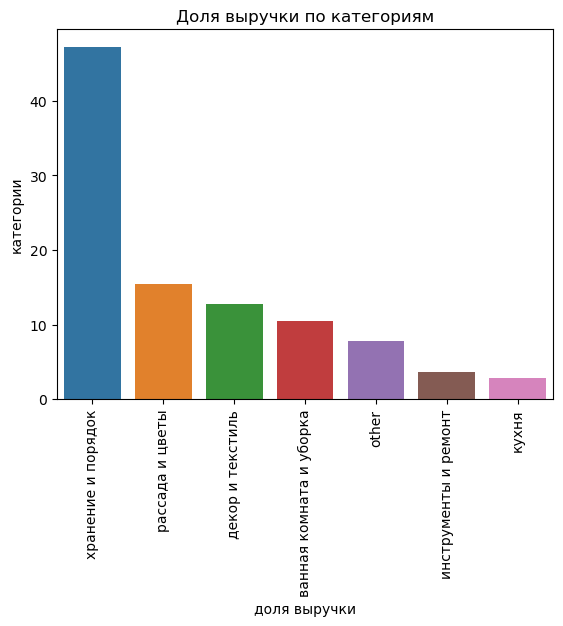

In [101]:
df_cat_sorted = df_cat.sort_values('%_revenue', ascending=False)

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_revenue', order=order)

plt.xlabel('доля выручки')
plt.ylabel('категории')
plt.title('Доля выручки по категориям')

plt.xticks(rotation=90);

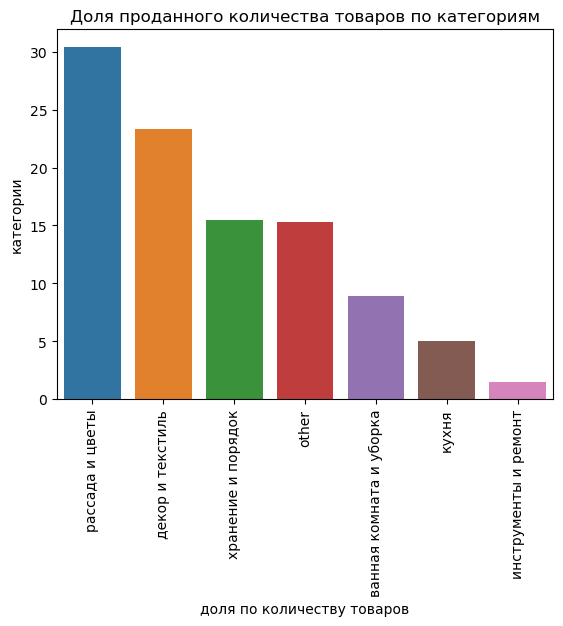

In [102]:
df_cat_sorted = df_cat.sort_values('%_quantity', ascending=False)  

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_quantity', order=order) 

plt.xlabel('доля по количеству товаров')
plt.ylabel('категории')
plt.title('Доля проданного количества товаров по категориям')

plt.xticks(rotation=90);

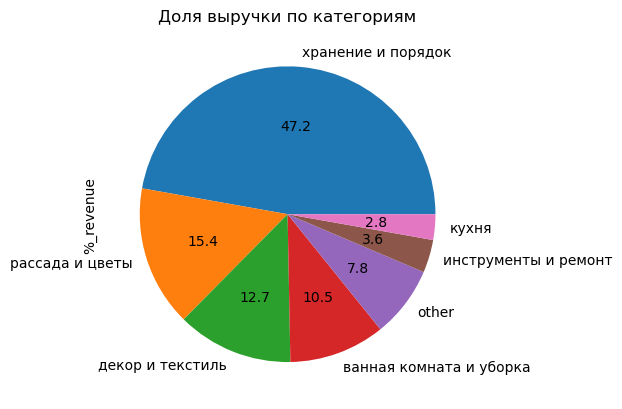

In [103]:
ax = df_cat['%_revenue'].plot.pie(autopct='%.1f')

plt.title('Доля выручки по категориям');

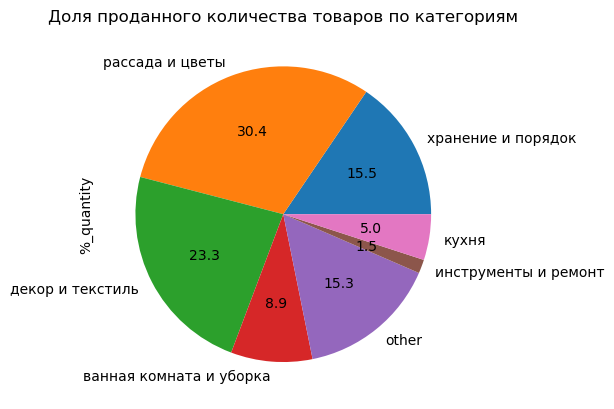

In [104]:
ax = df_cat['%_quantity'].plot.pie(autopct='%.1f')

plt.title('Доля проданного количества товаров по категориям');

<div style="border:solid purple 3px; padding: 20px">
В датасете представлено 2332 уникальных товаров
       
Выделили основные категории товаров это рассада и цветы, кухня, инструменты и ремонт, хранение и порядок, декор и текстиль, ванная комната и уборка, и категория Other. 
    
Больше всего товаров вошло в категорию рассада и цветы, декор и текстиль. Меньше всего в категорию инструменты и ремонт, кухня
    
По сумме продаж больше категория хранение и порядок	 на первом месте, меньше всего по продажам у категорий инструменты и ремонт, кухня.
    
По количеству проданных товаров на первом месте категория рассада и цветы, на последних те же категории.
    

### Выделим основной и дополнительный ассортимент

#### Для того, чтобы выделить эти 2 вида ассортимента, используем ABC анализ. Потому что он помогает быстро выявить наиболее ценные и приоритетные группы товаров, также ABC анализ опирается на объективный числовой показатель - долю товара в обороте компании. На основе ABC анализа можно выстроить сбалансированную стратегию - уделять 

**Категории:**

**A** - наиболее ценные, приоритетные товары. Формируют основную часть оборота и прибыли компании, но занимают небольшую долю ассортимента. К ним нужно пристальное внимание и забота.

**B** - товары средней значимости и вклада в выручку/прибыль. Требуют меньших усилий по поддержке ассортимента.

**C** - наименее приоритетные товары с невысоким вкладом в оборот. Требуют минимум усилий, часто рассматривается возможность исключения.

**Типичное распределение по группам:**

A - ~80% от оборота, ~20% ассортимента

B - ~15% от оборота, ~30% ассортимента

C - ~5% от оборота, ~50% ассортимента

In [105]:
# Сортировка по выручке  
df_sorted = df_addon.sort_values('sum_total', ascending=False)

# Доля от общей выручки
total_revenue = df_sorted['sum_total'].sum()
df_sorted['revenue_share'] = df_sorted['sum_total'] / total_revenue

# Накопительная доля для определения групп
df_sorted['cumulative_share'] = df_sorted['revenue_share'].cumsum()


In [106]:
# Добавление групп
df_sorted.loc[df_sorted['cumulative_share'] <= 0.8, 'group'] = 'A' 
df_sorted.loc[(df_sorted['cumulative_share'] > 0.8) &  
              (df_sorted['cumulative_share'] <= 0.95), 'group'] = 'B'
df_sorted.loc[df_sorted['cumulative_share'] > 0.95, 'group'] = 'C'

print(df_sorted[['product', 'group']])

                                                product group
5071   вешалки мягкие для деликатных вещей 3 шт шоколад     A
1518  простынь вафельная 200х180 см wellness rw180-0...     A
1299  тележка багажная delta тбр-22 синий грузоподъе...     A
1023      набор ножей attribute chef 5 предметов akf522     A
661   урна уличная "гео", hobbyka/хоббика, 59*37,5см...     A
...                                                 ...   ...
977          морковь детская сладость 2 г 4660010775921     C
7073   львиный зев волшебный ковер 0,05 г 4660010779639     C
1078   львиный зев волшебный ковер 0,05 г 4660010779639     C
5642  алиссум (лобулярия) снежные одежды 0,2 г 46500...     C
2159                горох амброзия 10,0 г 4660010772616     C

[5543 rows x 2 columns]


In [107]:
df_group = df_sorted.groupby('group').agg({
    'customer_id': 'nunique',
    'quantity': 'sum',  
    'order_id': 'count',
    'product': 'nunique',
    'price': 'mean', 
    'sum_total': 'sum'
}).round(2)

In [108]:
total_revenue = df_group['sum_total'].sum()
df_group['%_revenue'] = (df_group['sum_total'] / total_revenue * 100).round(1) 
 
total_quantity = df_group['quantity'].sum()
df_group['%_quantity'] = (df_group['quantity'] / total_quantity * 100).round(1)

df_group = df_group.sort_values(by='sum_total', ascending=False) 

df_group

,customer_id,quantity,order_id,product,price,sum_total,%_revenue,%_quantity
group,,,,,,,,
A,1186,7213,1497,855,1523.02,3140854.92,80.0,54.2
B,1171,3679,1925,938,246.01,589058.50,15.0,27.6
C,831,2422,2121,873,87.77,196366.00,5.0,18.2


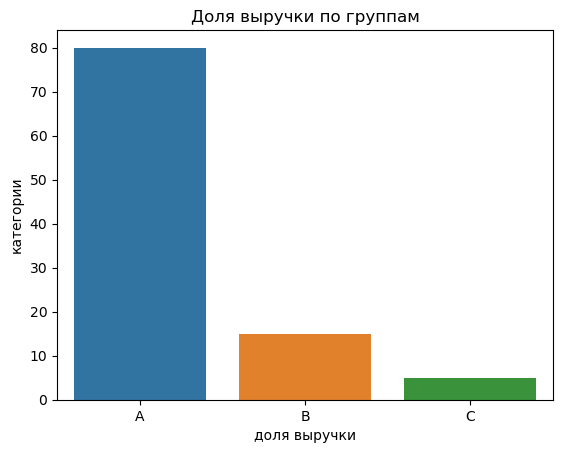

In [109]:
df_cat_sorted = df_group.sort_values('%_revenue', ascending=False)

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_revenue', order=order)

plt.xlabel('доля выручки')
plt.ylabel('категории')
plt.title('Доля выручки по группам');

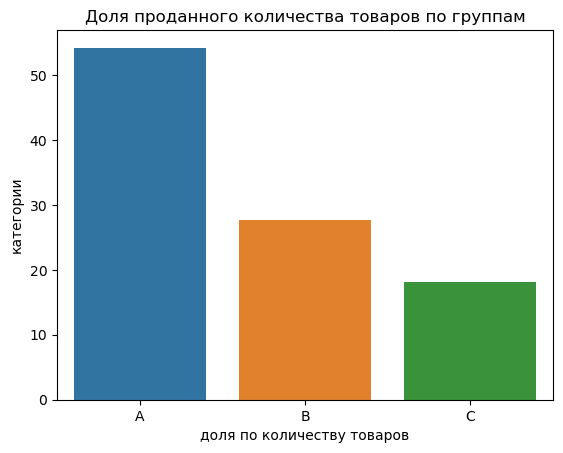

In [110]:
df_cat_sorted = df_group.sort_values('%_quantity', ascending=False)  

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_quantity', order=order) 

plt.xlabel('доля по количеству товаров')
plt.ylabel('категории')
plt.title('Доля проданного количества товаров по группам');

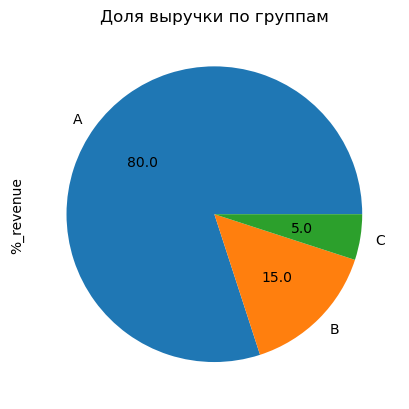

In [111]:
ax = df_group['%_revenue'].plot.pie(autopct='%.1f')

plt.title('Доля выручки по группам');

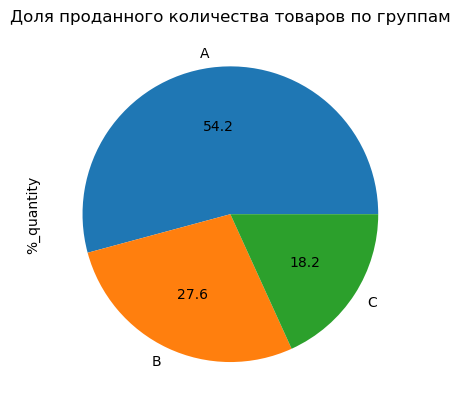

In [112]:
ax = df_group['%_quantity'].plot.pie(autopct='%.1f')

plt.title('Доля проданного количества товаров по группам');

<div style="border:solid purple 3px; padding: 20px">
    
Посредством ABC анализа ассортимента выявили 3 группы товаров, таким образом обозначили основной и дополнительный ассортимент. 

### Проверка статистических гипотез

##### Проверим 2 гипотезы: 
**Сформулируем гипотезы**

**Гипотеза 1**

H1 Доля продаж по категориям товаров одинаковая. 

H0 Существуют категории товаров, на долю которых приходится бо́льшая часть всех продаж интернет-магазина.

**Гипотеза 2**

H0: Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток.

H1: Существуют категории товаров, для которых спрос в разное время суток статистически значимо отличается.

**Гипотеза 3**

H0: Спрос (среднее количество продаж) на все категории товаров одинаков по дням недели.

H1: Существуют категории товаров, для которых спрос по дням недели статистически значимо различается.


**Для проверки гипотез мы будем использовать критерий Стьюдента.** 

Для гипотезы 1 критерий Стьюдента позволяет сравнить средние значения продаж или доли продаж для разных категорий товаров. Это оптимальный способ проверить, есть ли категории-лидеры или нет.

Для гипотез 2, 3 и 4 критерий Стьюдента для независимых выборок даёт возможность сравнить средние показатели продаж категорий товаров в разные периоды времени - по часам, дням, месяцам. Это наиболее прямой способ выявить различия в спросе.

Критерий Стьюдента не требует большого объёма данных и позволяет работать даже с относительно малыми выборками, если распределение не сильно отклоняется от нормального.
Также этот критерий достаточно прост в интерпретации - сравниваются конкретные средние значения показателей.


**Проверим гипотезу 1, о том, что -  Доля продаж по категориям товаров одинаковая.**

In [113]:
p_value = 0.05

for category in categories:

  print('----------------------------------------------------------------------')

  cat_sales = df_addon[df_addon['category'] == category]['sum_total']

  t_stat, p_value = ttest_1samp(cat_sales, df_addon['sum_total'].mean())
  print(category, "p-value =", p_value)

  if p_value < 0.05:
    print(category, "- отвергаем H0, продажи отличаются от среднего")
  else:
    print(category, "- H0 отвергнуть не получилось")

  print('----------------------------------------------------------------------')

----------------------------------------------------------------------
рассада и цветы p-value = 1.300961871582269e-215
рассада и цветы - отвергаем H0, продажи отличаются от среднего
----------------------------------------------------------------------
----------------------------------------------------------------------
кухня p-value = 0.009829354695914559
кухня - отвергаем H0, продажи отличаются от среднего
----------------------------------------------------------------------
----------------------------------------------------------------------
инструменты и ремонт p-value = 8.532637476421432e-10
инструменты и ремонт - отвергаем H0, продажи отличаются от среднего
----------------------------------------------------------------------
----------------------------------------------------------------------
хранение и порядок p-value = 5.327126128700282e-36
хранение и порядок - отвергаем H0, продажи отличаются от среднего
---------------------------------------------------------------

<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 1, о том, что Доля продаж по категориям товаров одинаковая. Мы выявили, что статистически значимые различя есть и гипотеза не подтвердилась, только у категории декор и текстиль гипотезу отвергнуть не получилось. 

**Проверим гипотезу 2, о том, что спрос (среднее количество продаж) на все категории товаров не зависит от времени суток.**

In [114]:
morning_sales = df_addon[df_addon['hours'] < 12]['quantity']  
evening_sales = df_addon[df_addon['hours'] >= 12]['quantity']

alpha = .05 # критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу.

results = st.ttest_ind(
    morning_sales, 
    evening_sales,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0313296361091489
Отвергаем нулевую гипотезу


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 2, о том, что Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток. Мы выявили, что статистически значимых различий нет. 

**Проверим гипотезу 2, о том, что спрос (среднее количество продаж) на все категории товаров не зависит дня недели.**

In [115]:
day1 = df_addon.query('day > 5')['quantity']
day2 = df_addon.query('day < 6')['quantity']

alpha = .05 # критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу.

results = st.ttest_ind(
    day1, 
    day2,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.010732811777507628
Отвергаем нулевую гипотезу


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 3, о том, что спрос (среднее количество продаж) на все категории товаров не зависит дня недели. Мы выявили, что статистически значимых различий нет. 

<div style="border:solid green 3px; padding: 20px">

**Итоговый вывод:**
    
В датасете представлены данные за период с 01.10.2018 по 31.01.2020. 

Больше всего заказов по кол-ву и по сумме в пн и вт, меньше в сб, вс. 
По часам больше заказов в период с 12 по 13 часов. Пик в 13 часов. По сумме с 13 по 14 часов и 11 часов. Пик 11-12. 
    
Меньше всего по кол-ву и по сумме ночью с 12 часов до утра 7. 

Самое большое кол-во заказов по месяцам с учетом года май 2019, апрель 2019 (также по сумме продаж), меньше всего заказов в январе и августе 2019 (также по сумме продаж). По сумме продаж больше всего в октябре 2018 и декабре 2018. Меньше продаж по сумме январь 2019 и ноябрь 2019
    
Больше всего было продано по сумме продаж - сумка-тележка 2-х колесная gimi argo синяя, топ -3 по прдажам это сумки тележки, также большая часть топа это сумки тележки в разных конфигурациях. 
    
Больше всего по кол-ву было продано пеларгония розебудная red pandora, также большую часть топа занимают данные растения.
    
В датасете представлено 2332 уникальных товаров
       
Выделили основные категории товаров это рассада и цветы, кухня, инструменты и ремонт, хранение и порядок, декор и текстиль, ванная комната и уборка, и категория Other. 
    
Больше всего товаров вошло в категорию рассада и цветы, декор и текстиль. Меньше всего в категорию инструменты и ремонт, кухня
    
По сумме продаж больше категория хранение и порядок	 на первом месте, меньше всего по прдажам у категорий инструменты и ремонт, кухня.
    
По количеству проданных товаров на первом месте категория рассада и цветы, на последних те же категории.    

Посредством ABC анализа ассортимента выявили 3 группы товаров, таким образом обозначили основной и дополнительный ассортимент. 
    
Проверили статистические гипотезы: 
- Доля продаж по категориям товаров одинаковая - гипотеза подтвердилась только в категории Декор и текстиль 
- Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток - гипотеза подтвердилась  
- Спрос (среднее количество продаж) на все категории товаров одинаков по дням недели - гипотеза подтвердилась     
    

## Презентация

https://drive.google.com/file/d/1vknY0LYI4hXf1Zg6wSHNxAnyWlRNLSwj/view?usp=sharing

## Дашборд

1. Диаграмма, отображающая сумму покупок по дням.

https://public.tableau.com/views/2_16911716019360/Sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

2. Гистограмма, отображающая распределение заказов по сумме.

https://public.tableau.com/views/3_16911716291730/Sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

3.  Общий дашборд
https://public.tableau.com/views/1_16911715632810/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_lin